In [49]:
import pandas as pd
import numpy as np


In [9]:
insurance = pd.read_csv(r"C:\Users\User\Desktop\Study Guide\ML Projects\Linear Regression\ML_Project_Insurance\insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552


In [8]:
# Task 1: Clean Data  Missing Values, Standardize Catergories, Standardize data type


In [10]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1272 non-null   float64
 1   sex       1272 non-null   object 
 2   bmi       1272 non-null   float64
 3   children  1272 non-null   float64
 4   smoker    1272 non-null   object 
 5   region    1272 non-null   object 
 6   charges   1284 non-null   object 
dtypes: float64(3), object(4)
memory usage: 73.3+ KB


In [12]:
insurance.shape


(1338, 7)

In [13]:
insurance_filled = insurance.dropna()

In [14]:
insurance_filled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1208 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1208 non-null   float64
 1   sex       1208 non-null   object 
 2   bmi       1208 non-null   float64
 3   children  1208 non-null   float64
 4   smoker    1208 non-null   object 
 5   region    1208 non-null   object 
 6   charges   1208 non-null   object 
dtypes: float64(3), object(4)
memory usage: 75.5+ KB


In [25]:
insurance_filled["sex"].unique()

array(['female', 'male', 'woman', 'F', 'man', 'M'], dtype=object)

In [27]:
#Create a hashmap/dictionary to change all to female and male

In [34]:
FEMALE = "female"
MALE = "male"

sex_map ={'Female':FEMALE, 'woman':FEMALE, 'man':MALE,'MALE':MALE}
insurance_filled["sex"] = insurance_filled["sex"].replace(sex_map)

In [35]:
insurance_filled["sex"].unique()

array(['female', 'male'], dtype=object)

In [15]:
insurance_filled["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [37]:
#convert smoking to boolean

In [38]:
insurance_filled["smoker"] = (insurance_filled["smoker"] =='yes')

In [40]:
insurance_filled.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,True,southwest,16884.924
1,18.0,male,33.770,1.0,False,southeast,1725.5523
2,28.0,male,33.000,3.0,False,southeast,$4449.462
3,33.0,male,22.705,0.0,False,northwest,$21984.47061
4,32.0,male,28.880,0.0,False,northwest,$3866.8552


In [16]:
insurance_filled["region"].unique()


array(['southwest', 'Southeast', 'southeast', 'northwest', 'Northwest',
       'Northeast', 'northeast', 'Southwest'], dtype=object)

In [20]:
pd.options.mode.copy_on_write = True 

In [21]:
insurance_filled["region"]= insurance_filled["region"].str.lower()


In [23]:
insurance_filled["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [24]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1272 non-null   float64
 1   sex       1272 non-null   object 
 2   bmi       1272 non-null   float64
 3   children  1272 non-null   float64
 4   smoker    1272 non-null   object 
 5   region    1272 non-null   object 
 6   charges   1284 non-null   object 
dtypes: float64(3), object(4)
memory usage: 73.3+ KB


In [39]:
insurance_filled.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1208 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1208 non-null   float64
 1   sex       1208 non-null   object 
 2   bmi       1208 non-null   float64
 3   children  1208 non-null   float64
 4   smoker    1208 non-null   bool   
 5   region    1208 non-null   object 
 6   charges   1208 non-null   object 
dtypes: bool(1), float64(3), object(3)
memory usage: 67.2+ KB


In [41]:
#check random entries of charges


In [47]:
insurance_filled["charges"].sample(15)

149      1842.51900
1303    37829.72420
117     19107.77960
1226     6640.54485
775     10560.49170
639     12949.15540
1010     8269.04400
215      7371.77200
592      2566.47070
1044    11394.06555
936     32108.66282
461     22144.03200
668     45710.20785
652      8280.62270
1139    36898.73308
Name: charges, dtype: float64

In [44]:
#strip the dollar sign and convert to float64 datatype

In [46]:
insurance_filled["charges"] = insurance_filled["charges"].str.strip("$").astype('float64')

In [48]:
insurance_filled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1208 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1208 non-null   float64
 1   sex       1208 non-null   object 
 2   bmi       1208 non-null   float64
 3   children  1208 non-null   float64
 4   smoker    1208 non-null   bool   
 5   region    1208 non-null   object 
 6   charges   1207 non-null   float64
dtypes: bool(1), float64(4), object(2)
memory usage: 67.2+ KB


In [50]:
insurance_pos = insurance_filled.apply(lambda x: x.abs() if np.issubdtype(x.dtype, np.number) else x)


In [51]:
insurance_pos.sample(20)

,age,sex,bmi,children,smoker,region,charges
1235,26.0,male,31.065,0.0,False,northwest,2699.56835
152,32.0,female,37.145,3.0,False,northeast,6334.34355
321,26.0,female,29.640,4.0,False,northeast,24671.66334
1337,61.0,female,29.070,0.0,True,northwest,29141.36030
419,63.0,female,26.980,0.0,True,northwest,28950.46920
182,22.0,male,19.950,3.0,False,northeast,4005.42250
416,52.0,male,34.100,0.0,False,southeast,9140.95100
731,53.0,male,21.400,1.0,False,southwest,10065.41300
691,47.0,male,36.200,1.0,False,southwest,8068.18500
1063,36.0,male,28.595,3.0,False,northwest,6548.19505


In [52]:
import matplotlib.pyplot as plt

In [53]:
df = insurance_pos.copy()

In [54]:
df.sample(10)

,age,sex,bmi,children,smoker,region,charges
668,62.0,male,32.015,0.0,True,northeast,45710.20785
460,49.0,female,36.630,3.0,False,southeast,10381.47870
1026,19.0,male,26.030,1.0,True,northwest,16450.89470
805,45.0,female,35.815,0.0,False,northwest,7731.85785
74,44.0,male,27.400,2.0,False,southwest,7726.85400
47,28.0,female,34.770,0.0,False,northwest,3556.92230
73,58.0,male,32.010,1.0,False,southeast,11946.62590
437,35.0,male,28.900,3.0,False,southwest,5926.84600
9,60.0,female,25.840,0.0,False,northwest,28923.13692
6,46.0,female,33.440,1.0,False,southeast,8240.58960


In [55]:
#check correlation

In [57]:
df.corr(numeric_only = True) ['charges']

age         0.291875
bmi         0.199039
children    0.071256
smoker      0.785997
charges     1.000000
Name: charges, dtype: float64

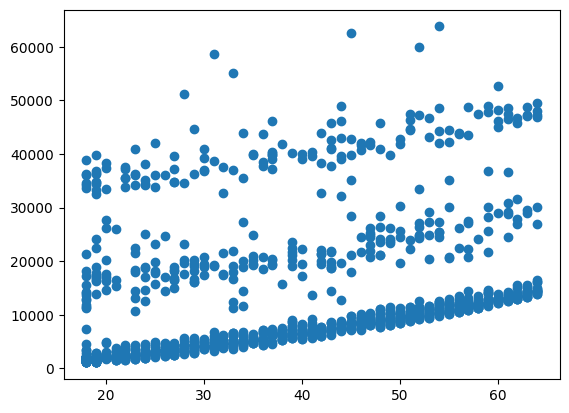

In [59]:
plt.scatter(df['age'],df['charges'])

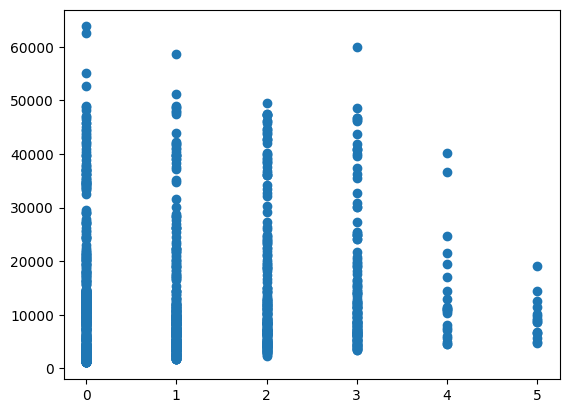

In [60]:
plt.scatter(df['children'],df['charges'])

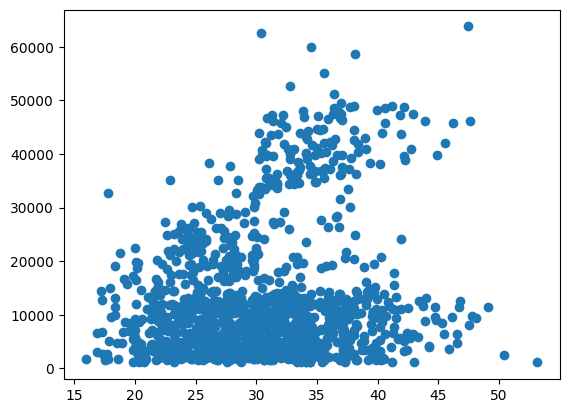

In [61]:
plt.scatter(df['bmi'],df['charges'])

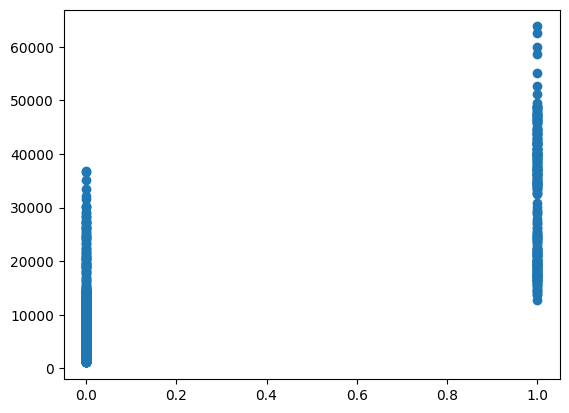

In [62]:
plt.scatter(df['smoker'],df['charges'])

In [77]:
df.sample(10)


,age,sex,bmi,children,smoker,region,charges
915,24.0,female,33.990,0.0,False,southeast,2473.33410
52,48.0,male,28.000,1.0,True,southwest,23568.27200
1149,42.0,male,34.100,0.0,False,southwest,5979.73100
627,33.0,male,42.460,1.0,False,southeast,11326.71487
232,19.0,female,17.800,0.0,False,southwest,1727.78500
921,62.0,female,33.200,0.0,False,southwest,13462.52000
1167,29.0,female,24.600,2.0,False,southwest,4529.47700
1139,19.0,female,32.490,0.0,True,northwest,36898.73308
537,46.0,female,30.200,2.0,False,southwest,8825.08600
786,60.0,male,36.955,0.0,False,northeast,12741.16745


In [82]:
df_new = pd.get_dummies(df, prefix=['region'], columns=['region'])
df_new = df_new.drop(columns=['region_southeast'])
df_new.head()
df_new['region_northeast'] = df_new['region_northeast'].astype('int64')
df_new['region_northwest'] = df_new['region_northwest'].astype('int64')
df_new['region_southwest'] = df_new['region_southwest'].astype('int64')

In [83]:
df_new.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southwest
0,19.0,female,27.900,0.0,True,16884.92400,0,0,1
1,18.0,male,33.770,1.0,False,1725.55230,0,0,0
2,28.0,male,33.000,3.0,False,4449.46200,0,0,0
3,33.0,male,22.705,0.0,False,21984.47061,0,1,0
4,32.0,male,28.880,0.0,False,3866.85520,0,1,0


In [84]:
df_new['smoker'] = df_new['smoker'].astype('int64')

In [85]:
df_new.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southwest
0,19.0,female,27.900,0.0,1,16884.92400,0,0,1
1,18.0,male,33.770,1.0,0,1725.55230,0,0,0
2,28.0,male,33.000,3.0,0,4449.46200,0,0,0
3,33.0,male,22.705,0.0,0,21984.47061,0,1,0
4,32.0,male,28.880,0.0,0,3866.85520,0,1,0


In [86]:
df_new["is_male"] = (df_new["sex"]== "male").astype("int8")

In [87]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1208 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1208 non-null   float64
 1   sex               1208 non-null   object 
 2   bmi               1208 non-null   float64
 3   children          1208 non-null   float64
 4   smoker            1208 non-null   int64  
 5   charges           1207 non-null   float64
 6   region_northeast  1208 non-null   int64  
 7   region_northwest  1208 non-null   int64  
 8   region_southwest  1208 non-null   int64  
 9   is_male           1208 non-null   int8   
dtypes: float64(4), int64(4), int8(1), object(1)
memory usage: 95.6+ KB


In [88]:
df_new=df_new.drop(columns =['sex'])

In [89]:
df_new.sample(15)

,age,bmi,children,smoker,charges,region_northeast,region_northwest,region_southwest,is_male
942,18.0,40.185,0.0,0,2217.46915,1,0,0,0
976,48.0,40.150,0.0,0,7804.16050,0,0,0,1
715,60.0,28.900,0.0,0,12146.97100,0,0,1,1
970,50.0,28.160,3.0,0,10702.64240,0,0,0,0
466,60.0,28.700,1.0,0,13224.69300,0,0,1,0
913,44.0,27.500,1.0,0,7626.99300,0,0,1,0
886,57.0,28.975,0.0,1,27218.43725,1,0,0,1
1320,31.0,31.065,3.0,0,5425.02335,0,1,0,1
1056,48.0,28.900,0.0,0,8277.52300,0,0,1,0
544,54.0,30.210,0.0,0,10231.49990,0,1,0,1


In [90]:
#Fit a regression model to the data

In [107]:

df_new = df_new.dropna()

In [108]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1207 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1207 non-null   float64
 1   bmi               1207 non-null   float64
 2   children          1207 non-null   float64
 3   smoker            1207 non-null   int64  
 4   charges           1207 non-null   float64
 5   region_northeast  1207 non-null   int64  
 6   region_northwest  1207 non-null   int64  
 7   region_southwest  1207 non-null   int64  
 8   is_male           1207 non-null   int8   
dtypes: float64(4), int64(4), int8(1)
memory usage: 86.0 KB


In [119]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score  

In [110]:
#drop the output column and assign to y, makey every other column to be use as inputs as x

In [120]:
X = df_new.drop(columns=['charges'])
y = df_new['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the R squared score
r2_score = r2_score(y_test, y_pred)

# Output the mean squared error
r2_score

0.7049323160872817

In [147]:
def preprocess_df(df):
    df_new = pd.get_dummies(df, prefix=['region'], columns=['region'])
    df_new = df_new.drop(columns=['region_southeast'])
    df_new['region_northeast'] = df_new['region_northeast'].astype('int64')
    df_new['region_northwest'] = df_new['region_northwest'].astype('int64')
    df_new['region_southwest'] = df_new['region_southwest'].astype('int64')

    df_new['smoker'] = (df_new['smoker'] == 'yes')
    df_new['smoker'] = df_new['smoker'].astype('int64')

    df_new['is_male'] = (df_new['sex'] == 'male').astype('int64')
    df_new = df_new.drop(columns=['sex'])
    
    return df_new
    
    

In [148]:
val_df = pd.read_csv(r"C:\Users\User\Desktop\Study Guide\ML Projects\Linear Regression\ML_Project_Insurance\validation_dataset.csv")

In [123]:
#match the insurance file preperation with the validation file

In [149]:
val_df.head()

,age,sex,bmi,children,smoker,region
0,18.0,female,24.090000,1.0,no,southeast
1,39.0,male,26.410000,0.0,yes,northeast
2,27.0,male,29.150000,0.0,yes,southeast
3,71.0,male,65.502135,13.0,yes,southeast
4,28.0,male,38.060000,0.0,no,southeast


In [150]:
input_df = preprocess_df(val_df)

In [151]:
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               50 non-null     float64
 1   bmi               50 non-null     float64
 2   children          50 non-null     float64
 3   smoker            50 non-null     int64  
 4   region_northeast  50 non-null     int64  
 5   region_northwest  50 non-null     int64  
 6   region_southwest  50 non-null     int64  
 7   is_male           50 non-null     int64  
dtypes: float64(3), int64(5)
memory usage: 3.3 KB


In [152]:
input_df.sample(10)

,age,bmi,children,smoker,region_northeast,region_northwest,region_southwest,is_male
4,28.0,38.060000,0.0,0,0,0,0,1
3,71.0,65.502135,13.0,1,0,0,0,1
45,58.0,36.955000,2.0,1,0,1,0,1
11,51.0,36.670000,2.0,0,0,1,0,0
42,29.0,27.200000,0.0,0,0,0,1,1
43,89.0,68.736874,6.0,1,0,1,0,1
36,78.0,66.370173,11.0,1,0,1,0,1
18,84.0,75.742693,2.0,1,0,0,1,0
15,18.0,30.400000,3.0,0,1,0,0,1
46,92.0,84.973279,11.0,1,0,0,1,1


In [153]:
predictions = model.predict(input_df)

In [158]:
predictions

array([ 3.52537878e+02,  3.09562147e+04,  2.77994096e+04,  5.71944148e+04,
        6.68542631e+03,  5.86778384e+04,  7.04440596e+03,  1.30656580e+04,
        1.26657036e+04,  1.61425411e+04,  2.52853835e+03,  1.44317748e+04,
        1.13808735e+04,  1.20997623e+04,  2.69587308e+03,  3.72888611e+03,
        4.25657672e+04,  6.43384787e+04,  5.93902149e+04,  1.15252685e+04,
       -5.82951707e+01,  1.28982287e+04,  3.24813915e+04,  1.21666342e+04,
        9.75512982e+03,  5.09785330e+03,  5.90920861e+04,  3.34504228e+03,
        1.18776338e+04,  1.05767394e+04,  6.18916893e+03,  2.72111048e+04,
        3.11411087e+04,  1.34473395e+04,  3.26866927e+04,  1.39288587e+04,
        5.91570393e+04,  1.44799199e+04, -2.37352284e+02,  2.97924065e+04,
        3.02110368e+04,  1.17286358e+04,  3.73534807e+03,  6.05651275e+04,
        5.62647547e+03,  4.02915840e+04,  6.83106824e+04,  3.06084743e+04,
        1.50741321e+04,  3.55325780e+04])

In [154]:
validation_data = val_df.copy()

In [156]:
validation_data["predicted_charges"] = predictions

In [159]:
validation_data.loc[validation_data['predicted_charges'] < 1000, 'predicted_charges'] = 1000

In [160]:
validation_data

,age,sex,bmi,children,smoker,region,predicted_charges
0,18.0,female,24.090000,1.0,no,southeast,1000.000000
1,39.0,male,26.410000,0.0,yes,northeast,30956.214707
2,27.0,male,29.150000,0.0,yes,southeast,27799.409607
3,71.0,male,65.502135,13.0,yes,southeast,57194.414804
4,28.0,male,38.060000,0.0,no,southeast,6685.426312
5,70.0,female,72.958351,11.0,yes,southeast,58677.838443
6,29.0,female,32.110000,2.0,no,northwest,7044.405963
7,42.0,female,41.325000,1.0,no,northeast,13065.658004
8,48.0,female,36.575000,0.0,no,northwest,12665.703636
9,63.0,male,33.660000,3.0,no,southeast,16142.541083
